In [38]:
#Nama:Juan Anemao Sokhi Zidomi
#NIM:1103204007
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
drive.mount('/content/drive')

#Melakukan pembacaan data set
file_path='/content/drive/MyDrive/diamonds.csv'
datas=pd.read_csv(file_path)

print(datas.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [28]:

datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [29]:
features=['carat','cut','clarity','depth','table','price','x','y','z']
for feature in features:
  print(f"Jumlah unique value for {feature} :{datas[feature].nunique()}")

Jumlah unique value for carat :273
Jumlah unique value for cut :5
Jumlah unique value for clarity :8
Jumlah unique value for depth :184
Jumlah unique value for table :127
Jumlah unique value for price :11602
Jumlah unique value for x :554
Jumlah unique value for y :552
Jumlah unique value for z :375


In [30]:
#inisiasi variabel yang akan digunakan saat visualisasi dan dibedakan
numerical_features=['carat','depth','table','x','y','z']
categorical_features=['cut','color','clarity']
target=['price']
print("Numerical Features: ",numerical_features)
print("Categorical Features :",categorical_features)
print("Target :",target)

Numerical Features:  ['carat', 'depth', 'table', 'x', 'y', 'z']
Categorical Features : ['cut', 'color', 'clarity']
Target : ['price']


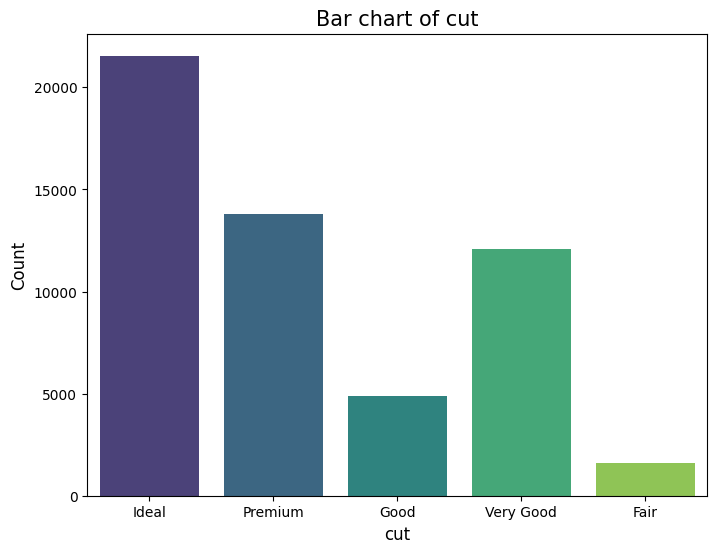

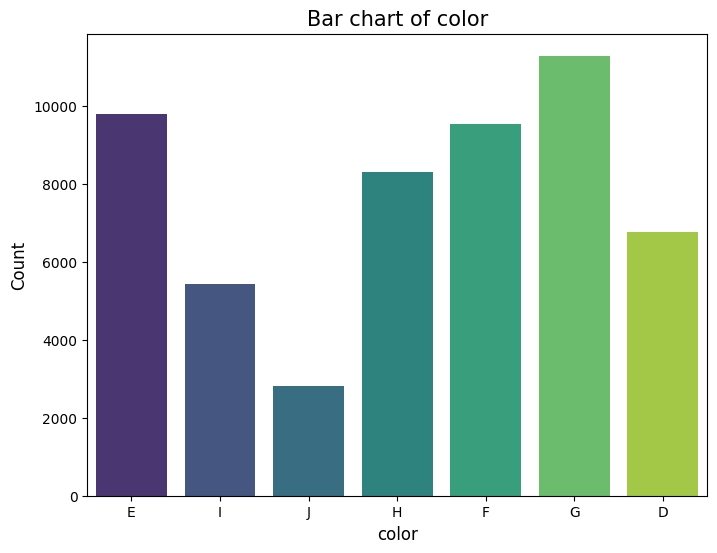

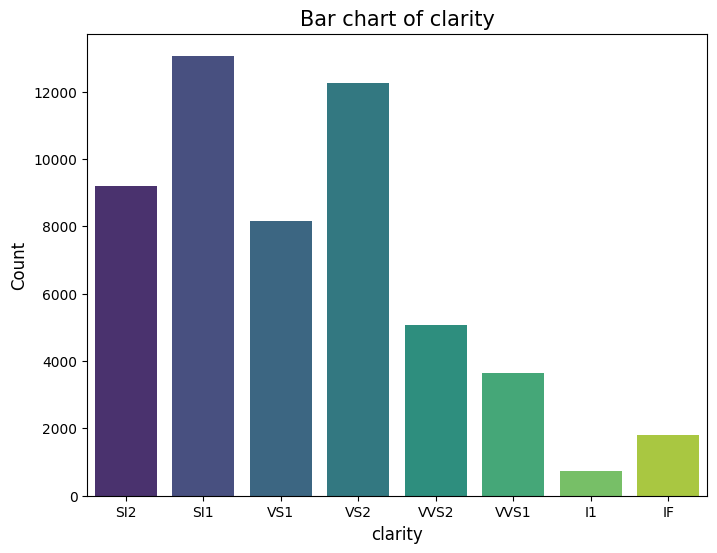

In [31]:
#visualisasi menggunakan bar chart
for feature in categorical_features:
  plt.figure(figsize=(8,6))
  sns.countplot(x=feature,data=datas,palette='viridis')
  plt.title(f'Bar chart of {feature}',size=15)
  plt.xlabel(feature,size=12)
  plt.ylabel('Count',size=12)
  plt.show()

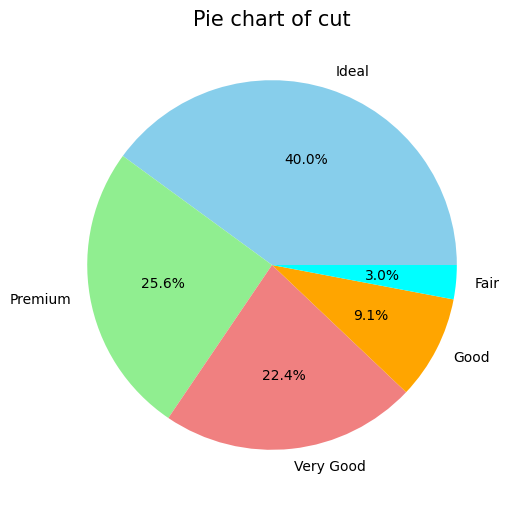

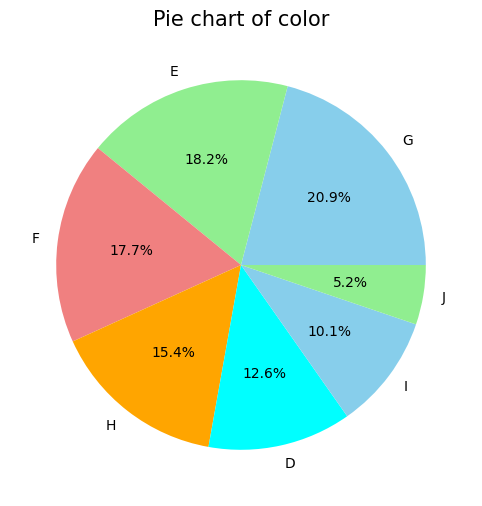

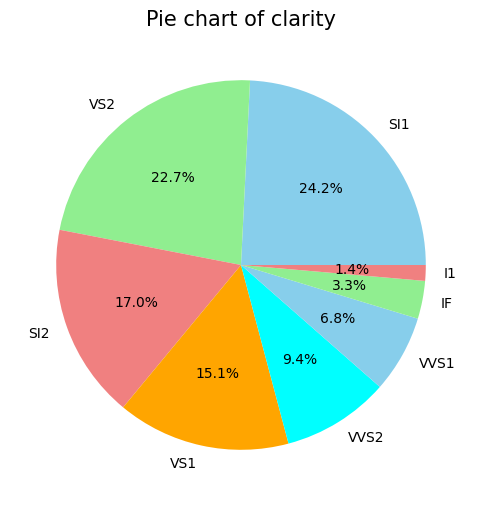

In [32]:
#Melakukan visualisasi pie chart
for feature in categorical_features:
  plt.figure(figsize=(8,6))
  datas[feature].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['skyblue','lightgreen','lightcoral','orange','aqua'])
  plt.title(f'Pie chart of {feature}',size=15)
  plt.ylabel('')
  plt.show()

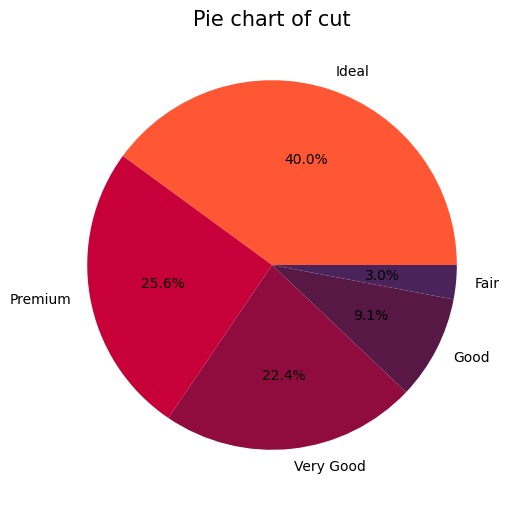

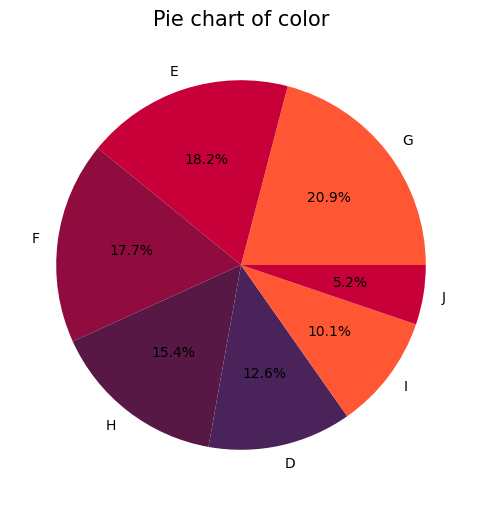

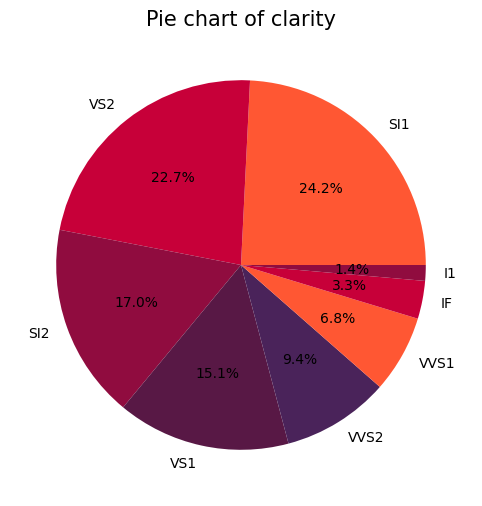

In [33]:
#Melakukan pengubahan warna pada pie chart
bold_colors=['#FF5733','#C70039','#900C3F','#581845','#4A235A',]
for feature in categorical_features:
  plt.figure(figsize=(8,6))
  datas[feature].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=bold_colors)
  plt.title(f"Pie chart of {feature}",size=15)
  plt.ylabel('')
  plt.show()

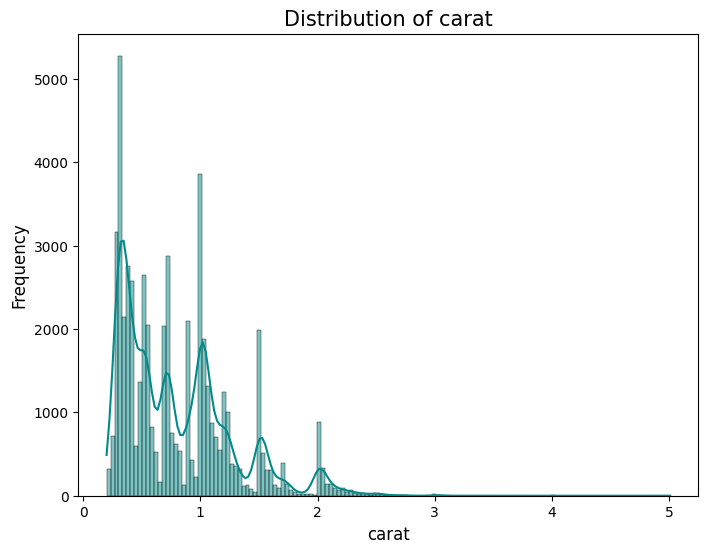

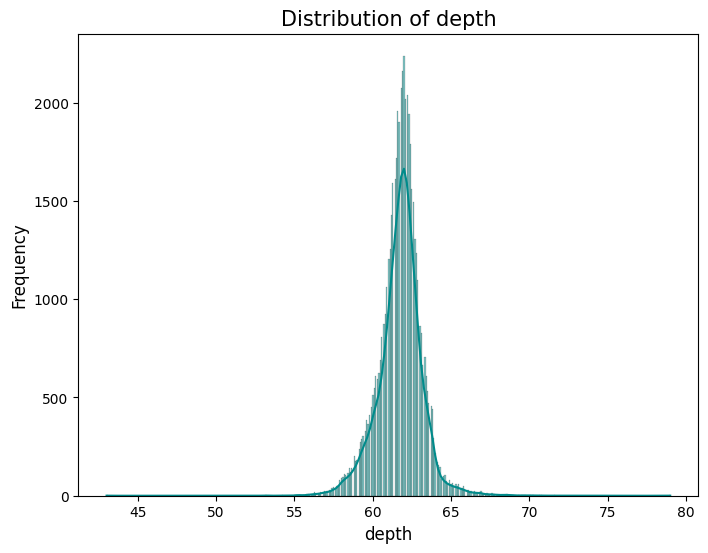

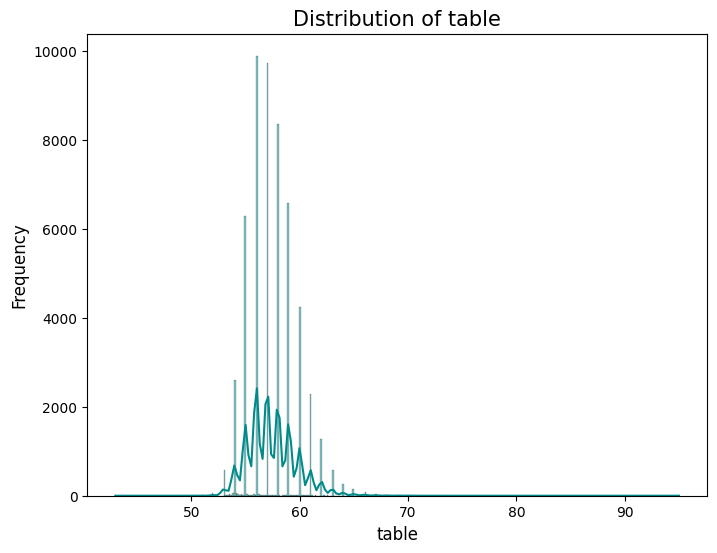

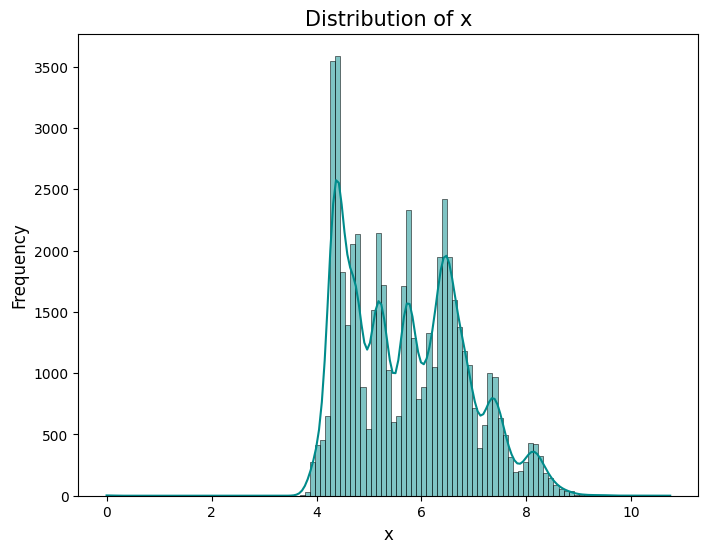

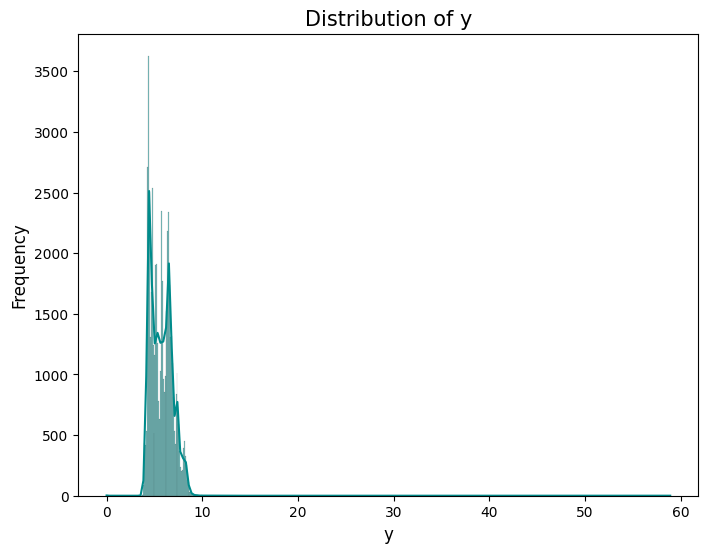

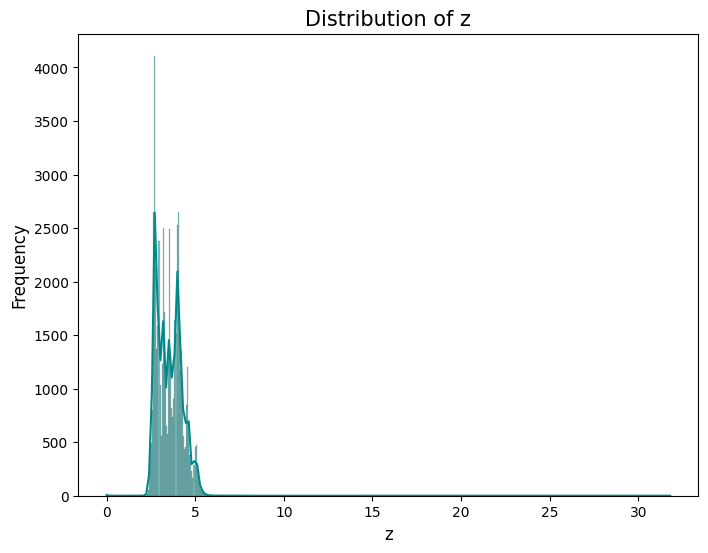

In [34]:
#Melakukan visualisasi data menggunakan histplot dari inisiasi variabel
for feature in numerical_features:
  plt.figure(figsize=(8,6))
  sns.histplot(datas[feature],kde=True,color='darkcyan')
  plt.title(f'Distribution of {feature}',size=15)
  plt.xlabel(feature,size=12)
  plt.ylabel('Frequency',size=12)
  plt.show()

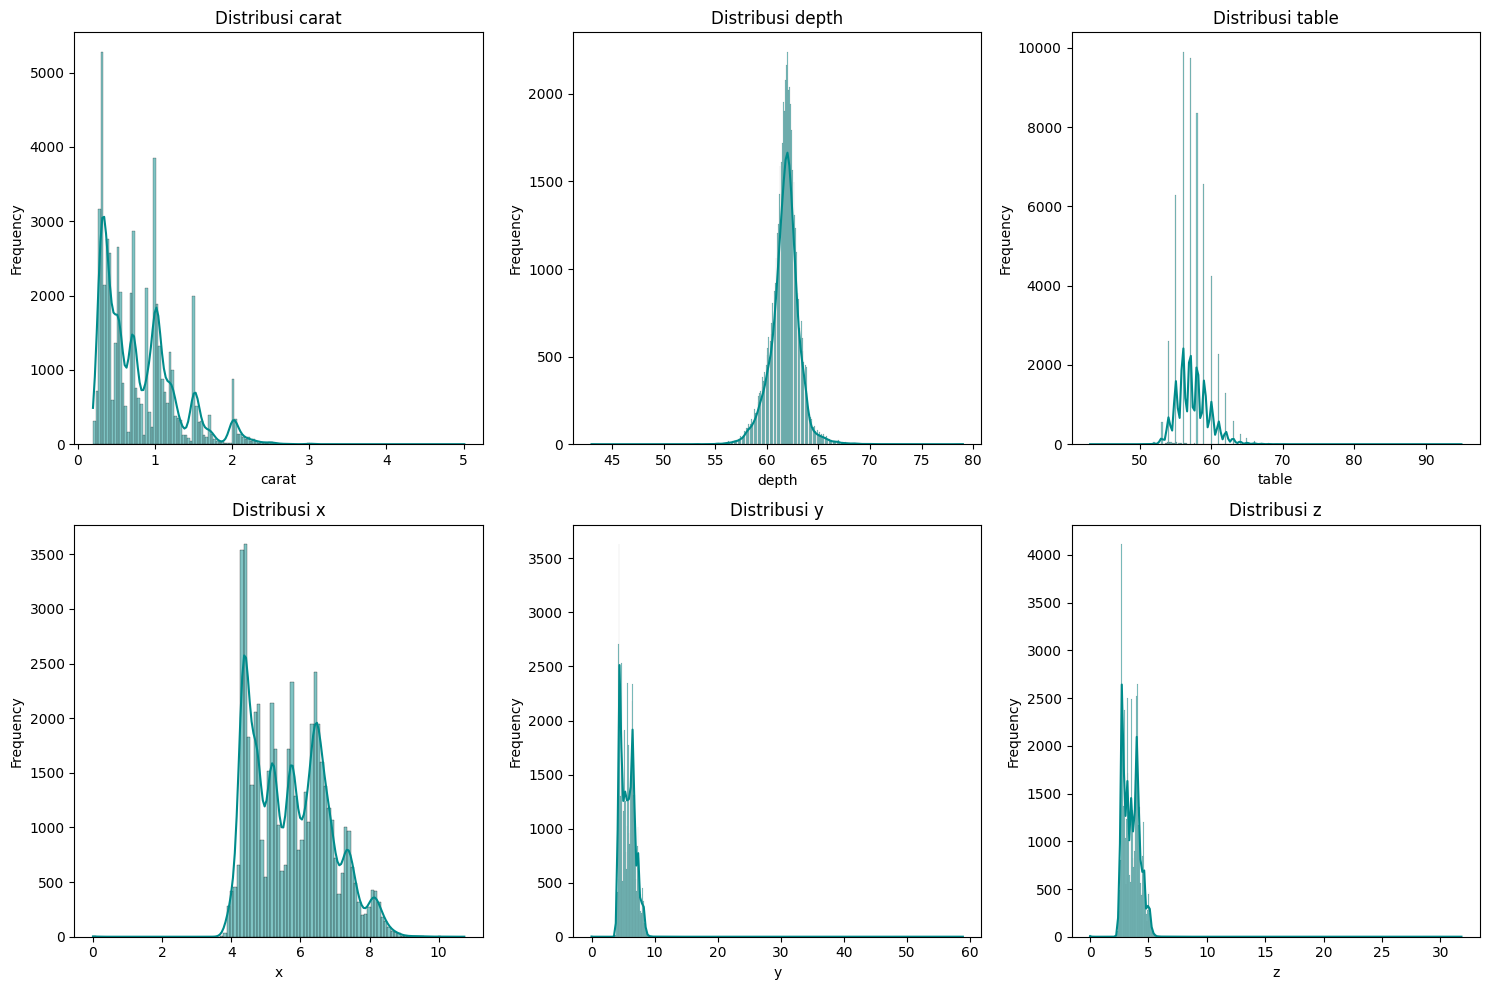

In [35]:
#menampilkan semua data dalam 2 baris 3 kolom
fig, axes = plt.subplots(2,3,figsize=(15,10))
for i ,feature in enumerate(numerical_features):
  sns.histplot(datas[feature],kde=True,color='darkcyan',ax=axes[i//3,i%3])
  axes[i//3, i%3].set_title(f'Distribusi {feature}', size=12)
  axes[i//3, i%3].set_xlabel(feature, size=10)
  axes[i//3, i%3].set_ylabel('Frequency', size=10)
plt.tight_layout()
plt.show()

In [36]:
#menampilkan visualisasi dari histogram dari dataset yang sudah dipiih
def plot_histogram(feature,bin_width):
      plt.figure(figsize=(8,6))
      bins=np.arange(min(datas[feature]),max(datas[feature]) + bin_width,bin_width)
      sns.histplot(datas[feature],kde=True,bins=bins,color='darkcyan')
      plt.title(f'Histogram of {feature}',size=15);
      plt.xlabel(feature,size=12)
      plt.ylabel('Frequency',size=12)
      plt.show()
for feature in numerical_features:
  interact(plot_histogram,feature=widgets.fixed(feature),bin_width=(0.1 ,1 ,0.1))

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

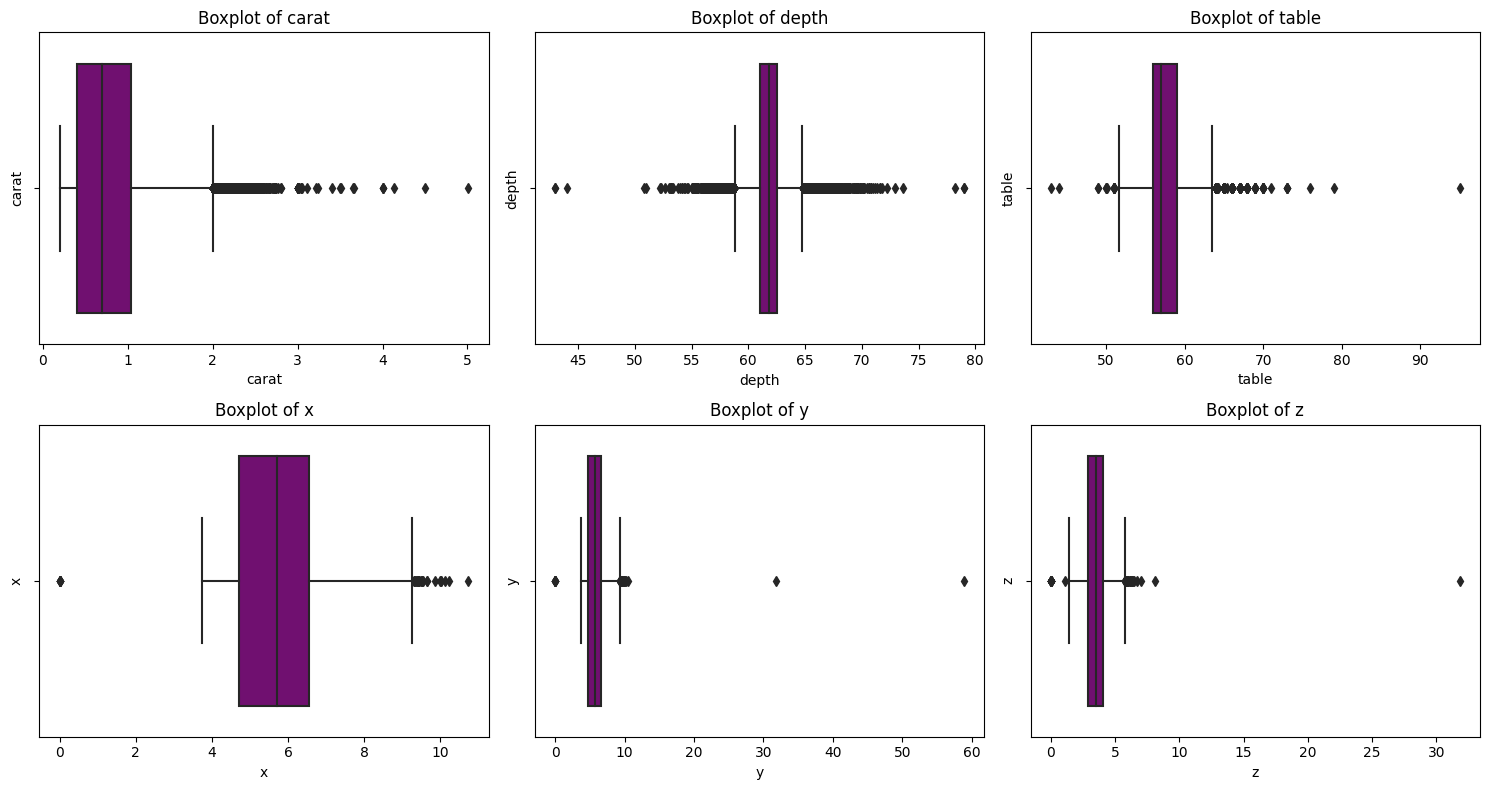

In [37]:
#Memvisualisasi box plot
fig,axes=plt.subplots(2,3,figsize=(15,8))
for i,feature in enumerate(numerical_features):
  sns.boxplot(x=datas[feature],ax=axes[i//3,i%3],orient='h',color='purple')
  axes[i//3,i%3].set_title(f'Boxplot of {feature}',size=12)
  axes[i//3,i%3].set_ylabel(feature,size=10)

plt.tight_layout()
plt.show()
